In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

frame = pd.read_csv('/content/NYC_EnergyConsumption.csv')
frame['timeStamp']=pd.to_datetime(frame['timeStamp'])

In [15]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [16]:
frame.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [17]:
fig = px.line(frame, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(buttons=list([dict(count=1, label="1y", step="year", stepmode="backward"),dict(count=2, label="3y", step="year", stepmode="backward"),dict(count=3, label="5y", step="year", stepmode="backward"), dict(step="all")])))
fig.show()

In [18]:
frame01=frame.set_index('timeStamp')

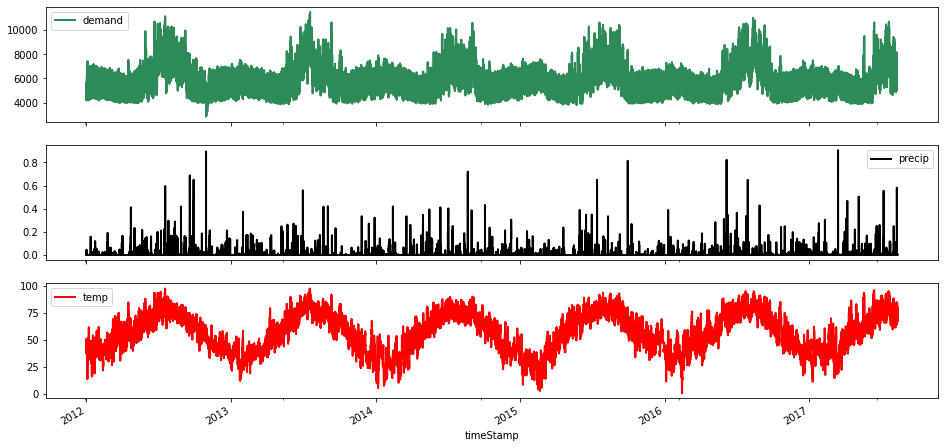

In [20]:
frame01.plot(subplots=True, color=['seagreen', "black", "red"], linewidth=2.0)
plt.show()

In [21]:
frame01.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


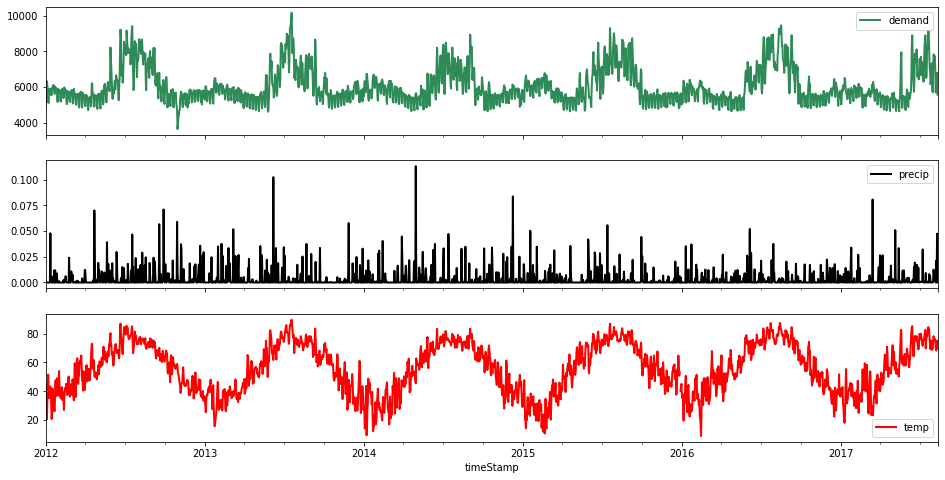

In [22]:
frame01.resample('D').mean().plot(subplots=True, color=['seagreen', "black", "red"], linewidth=2.0)
plt.show()

In [23]:
frame01_daily=frame01.resample('D').mean()
frame01_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [26]:
frame01_final=frame01_daily.reset_index()[['timeStamp','demand']].rename({'timeStamp':'ds','demand':'y'}, axis='columns')
frame01_final

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5582.297000
2049,2017-08-11,NaN


In [28]:
train=frame01_final[(frame01_final['ds'] >= '2012-01-01') & (frame01_final['ds'] <= '2017-04-30')]
test=frame01_final[(frame01_final['ds'] > '2017-04-30')]

In [29]:
train.shape, test.shape

((1947, 2), (104, 2))

In [31]:
model= Prophet(interval_width=0.95, yearly_seasonality=True)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
model.params

{'beta': array([[-0.03458069, -0.0705141 ,  0.05760564,  0.04705875, -0.01406572,
         -0.005001  , -0.00386455, -0.00073737,  0.00242053, -0.00755783,
          0.00405203,  0.0048309 , -0.00789597, -0.00470246,  0.00701919,
         -0.00268503, -0.00127789,  0.00170614,  0.00035376, -0.00021813,
         -0.02824817,  0.0238519 ,  0.02062351,  0.00054815, -0.0049496 ,
         -0.00501087]]),
 'delta': array([[ 2.97534563e-09, -2.54605198e-07, -1.01979086e-01,
         -1.12338365e-08,  2.80534300e-09,  1.62508765e-08,
         -5.22679734e-08, -1.16075049e-08, -1.53930702e-07,
         -2.92604184e-08, -2.69181000e-02, -7.35866468e-02,
         -1.45876933e-08, -5.89760992e-08,  2.35046545e-01,
          5.85259548e-05, -1.05435640e-07, -8.71744213e-02,
         -4.32663939e-02, -6.02327178e-08,  2.83861158e-08,
          3.24800542e-08,  8.00639127e-03,  3.86001162e-03,
          3.53863651e-07]]),
 'k': array([[0.08895525]]),
 'm': array([[0.59330417]]),
 'sigma_obs': array([

In [33]:
future = model.make_future_dataframe(periods=104)
future

,ds
0,2012-01-01
1,2012-01-02
2,2012-01-03
3,2012-01-04
4,2012-01-05
...,...
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11


In [34]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2012-01-01,5099.974833,4201.825245,6002.391376
1,2012-01-02,5784.546297,4905.680386,6774.300401
2,2012-01-03,5901.754775,4928.928103,6870.634161
3,2012-01-04,5909.587252,4923.311024,6793.372241
4,2012-01-05,5880.351199,5002.023692,6745.416768
5,2012-01-06,5849.008214,4935.729053,6777.595084
6,2012-01-07,5285.142984,4358.953855,6160.134054
7,2012-01-08,5178.730772,4316.205772,6096.458902
8,2012-01-09,5866.283244,4895.724386,6843.849663
9,2012-01-10,5985.825571,5072.283003,6870.705835


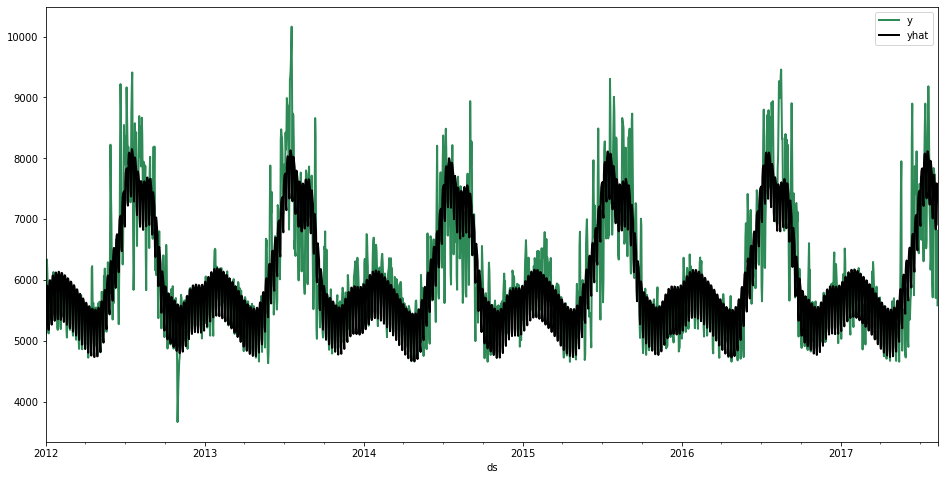

In [35]:
pd.concat([frame01_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot(color=['seagreen', "black"], linewidth=2.0)

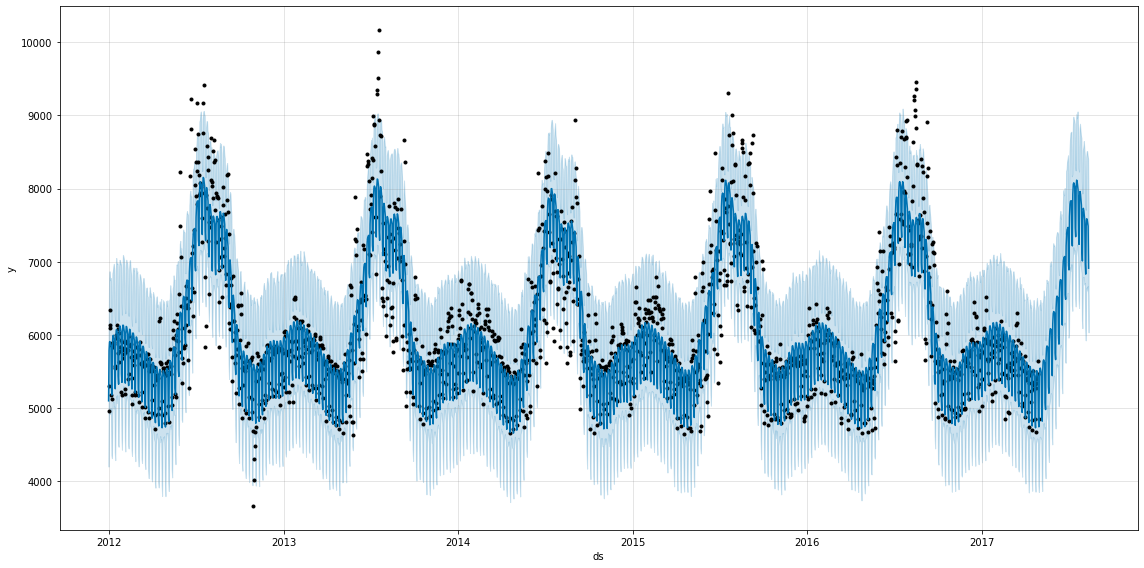

In [42]:
fig1 = model.plot(forecast, figsize=(16,8))

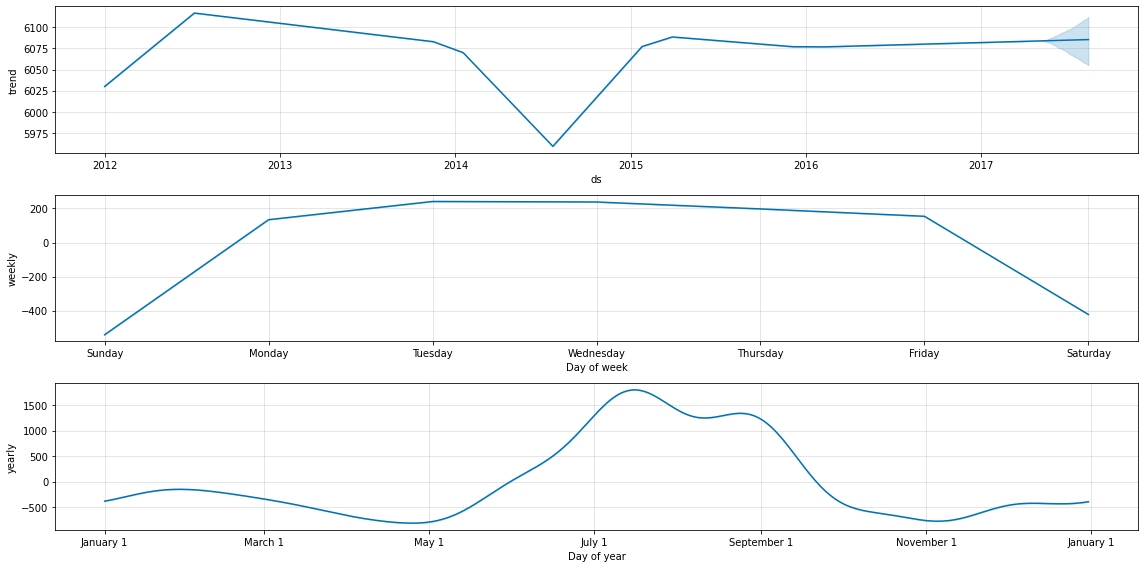

In [43]:
fig2 = model.plot_components(forecast, figsize=(16,8))

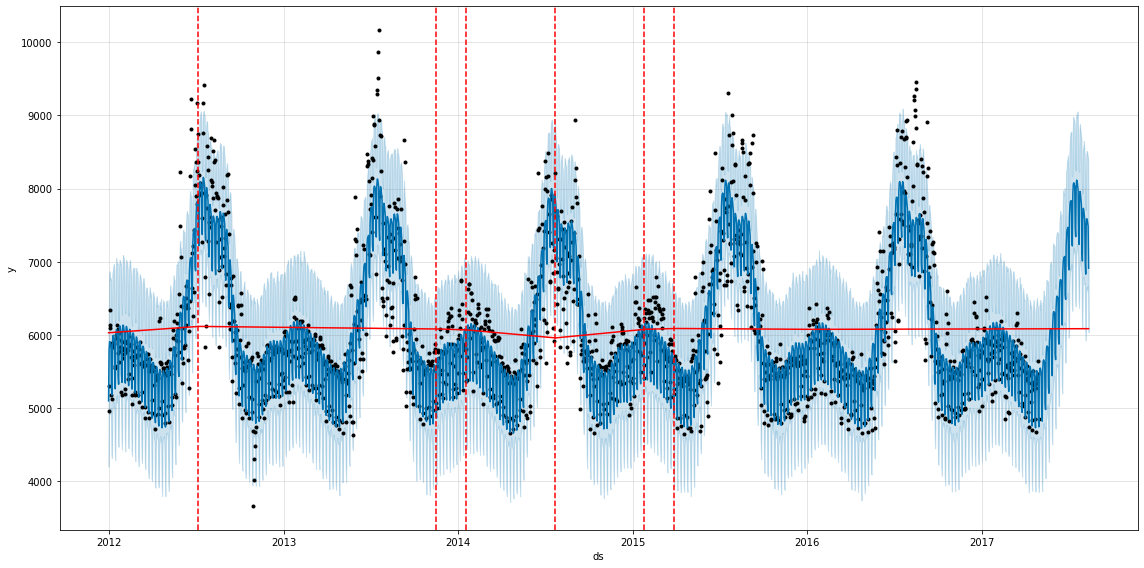

In [47]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast, figsize=(16,8))
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [48]:
deltas = model.params['delta'].mean(0)
deltas

array([ 2.97534563e-09, -2.54605198e-07, -1.01979086e-01, -1.12338365e-08,
        2.80534300e-09,  1.62508765e-08, -5.22679734e-08, -1.16075049e-08,
       -1.53930702e-07, -2.92604184e-08, -2.69181000e-02, -7.35866468e-02,
       -1.45876933e-08, -5.89760992e-08,  2.35046545e-01,  5.85259548e-05,
       -1.05435640e-07, -8.71744213e-02, -4.32663939e-02, -6.02327178e-08,
        2.83861158e-08,  3.24800542e-08,  8.00639127e-03,  3.86001162e-03,
        3.53863651e-07])

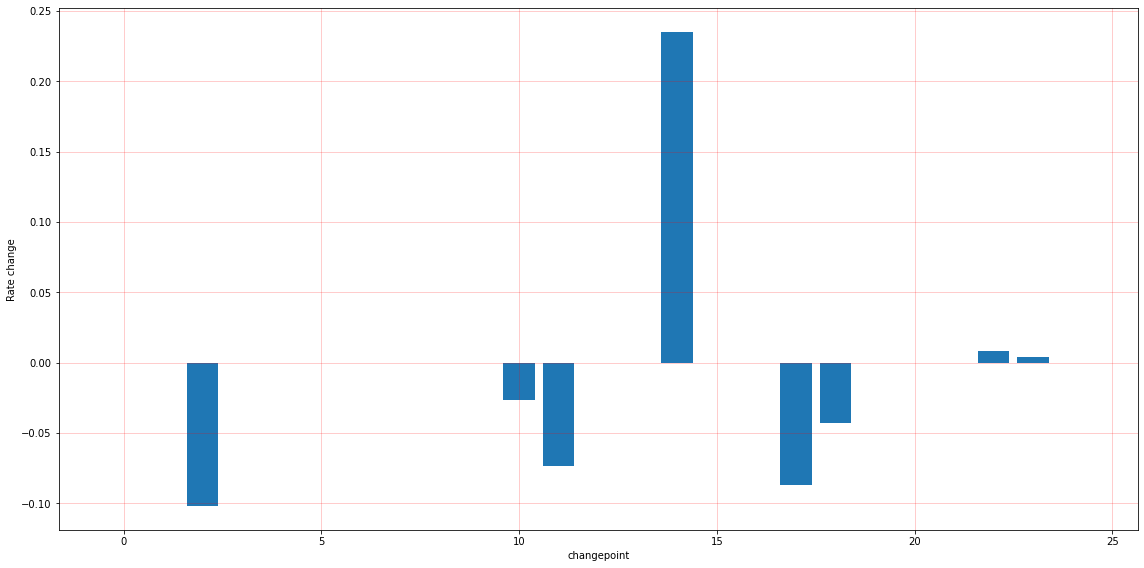

In [49]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [50]:
model.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


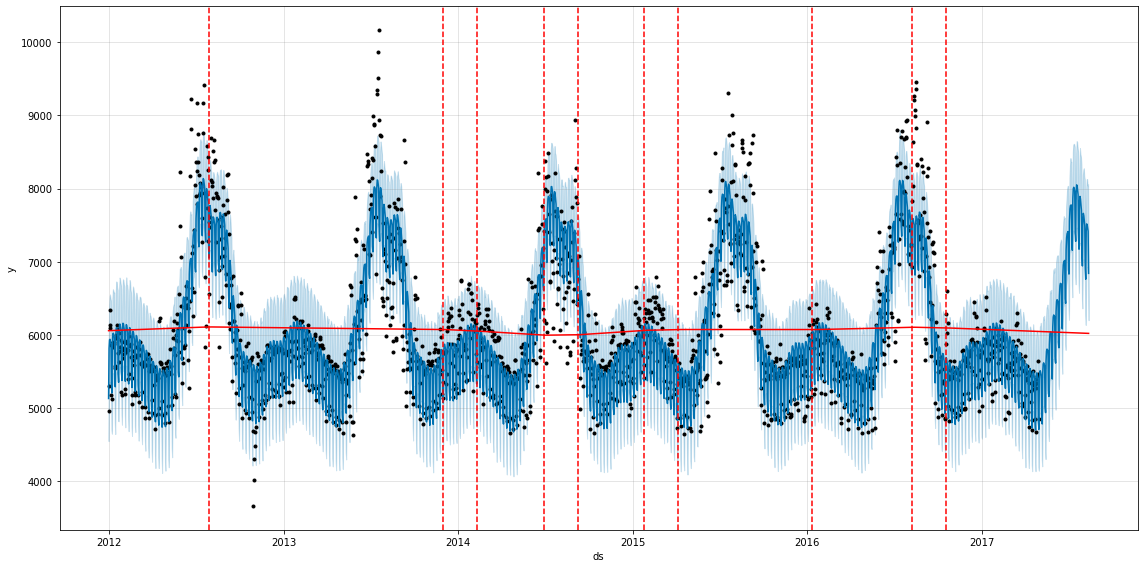

In [51]:
pro_change= Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig= pro_change.plot(forecast, figsize=(16,8));
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [53]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(model, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [54]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation( model = model, initial = '731 days', horizon = '365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [55]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5559.551339,4781.897754,6390.236230,5460.325000,2014-05-01
1,2014-05-03,4969.534110,4156.647690,5819.311868,4893.683333,2014-05-01
2,2014-05-04,4845.648008,3996.008535,5680.101798,4764.137500,2014-05-01
3,2014-05-05,5526.522430,4621.755104,6324.367704,5406.762500,2014-05-01
4,2014-05-06,5621.421825,4752.300829,6504.630915,5409.750000,2014-05-01


In [56]:
from fbprophet.diagnostics import performance_metrics
frame_p = performance_metrics(cv_results)
frame_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251934.957320,501.931228,406.226480,0.073006,0.064884,0.884615
1,37 days 00:00:00,258700.644740,508.626233,413.610053,0.074289,0.066338,0.879121
2,37 days 12:00:00,261010.981546,510.892339,417.001487,0.074872,0.067382,0.879121
3,38 days 00:00:00,263880.662431,513.693160,420.198633,0.075152,0.068328,0.879121
4,38 days 12:00:00,267581.621653,517.282922,425.433592,0.075989,0.069015,0.879121
...,...,...,...,...,...,...,...
653,363 days 00:00:00,259816.478758,509.721962,448.447325,0.082792,0.081943,0.983516
654,363 days 12:00:00,261440.978078,511.312994,449.524741,0.082983,0.081943,0.978022
655,364 days 00:00:00,266023.137790,515.774309,453.230988,0.083848,0.083850,0.972527
656,364 days 12:00:00,266023.939627,515.775086,452.936386,0.083833,0.083850,0.972527
